In [ ]:
#Este programa é utilizado para o desenvolvimento do desafio da disciplina FAM do bootcamp de MLE

In [ ]:
#importando as bibliotecas
import pandas as pd #biblioteca utilizada para o tratamento de dados via dataframes 
import numpy as np #biblioteca utilizada para o tratamento de valores numéricos (vetores e matrizes)
import seaborn as sns #biblioteca utilizada para criar gráficos mais "bonitos"
import matplotlib.pyplot as plt #biblioteca utilizada para construir os gráficos


In [ ]:
from google.colab import files  #biblioteca utilizada para carregar os dados para o google colab
uploaded = files.upload()

Saving comp_bikes_mod.csv to comp_bikes_mod (2).csv


In [ ]:
#Realizando a leitura do arquivo (dataset)
nome_do_arquivo="comp_bikes_mod.csv"
dataframe_bikes= pd.read_csv(nome_do_arquivo)

In [ ]:
#5 primeiras linhas do conjunto de dados
dataframe_bikes.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1.0,NaN,1.0,0.0,1.0,0.0,0.0,6.0,0.0,1.0,NaN,0.2879,0.81,0.0,3.0,13.0,16.0
1,2.0,2011-01-01,1.0,0.0,1.0,1.0,0.0,6.0,0.0,NaN,0.22,0.2727,0.80,0.0,8.0,32.0,40.0
2,3.0,2011-01-01,1.0,0.0,1.0,2.0,0.0,6.0,0.0,1.0,0.22,0.2727,0.80,0.0,5.0,27.0,32.0
3,4.0,2011-01-01,1.0,0.0,1.0,3.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.75,0.0,3.0,10.0,13.0
4,5.0,2011-01-01,1.0,0.0,1.0,4.0,0.0,6.0,NaN,1.0,0.24,0.2879,0.75,0.0,0.0,1.0,1.0


In [ ]:
#Informações do conjunto de dados
dataframe_bikes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15641 entries, 1 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     14060 non-null  float64       
 1   dteday      15641 non-null  datetime64[ns]
 2   season      14061 non-null  category      
 3   yr          14076 non-null  float64       
 4   mnth        14062 non-null  float64       
 5   hr          14068 non-null  float64       
 6   holiday     14076 non-null  float64       
 7   weekday     14078 non-null  float64       
 8   workingday  14097 non-null  float64       
 9   weathersit  14078 non-null  float64       
 10  temp        14066 non-null  float64       
 11  atemp       14076 non-null  float64       
 12  hum         15641 non-null  float64       
 13  windspeed   14082 non-null  float64       
 14  casual      15641 non-null  float64       
 15  registered  14090 non-null  float64       
 16  cnt         15641 non-

In [ ]:
#Forma do conjunto de dados
dataframe_bikes.shape

(17379, 17)

In [ ]:
#Percentual de valores nulos em "temp"
(dataframe_bikes['temp'].isnull().sum() / (dataframe_bikes['temp'].count() + dataframe_bikes['temp'].isnull().sum())) * 100

10.000575407100524

In [ ]:
#dRemovendo valores nulos de "dteday"
dataframe_bikes.dropna(subset=['dteday'],inplace=True)

In [ ]:
#Análise estatística
dataframe_bikes.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,14060.000000,14061.000000,14076.000000,14062.000000,14068.000000,14076.000000,14078.000000,14097.000000,14078.000000,14066.000000,14076.000000,14070.000000,14082.000000,14071.000000,14090.000000,14079.000000
mean,8679.717496,2.507930,0.501563,6.542810,11.486779,0.027707,3.006535,0.683053,1.422432,0.496926,0.476055,0.627357,0.189552,35.416317,153.280625,189.165850
std,5015.960092,1.110674,0.500015,3.443693,6.915101,0.164137,2.002829,0.465303,0.638937,0.192971,0.172827,0.192863,0.122309,48.770799,151.317869,181.223589
min,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4336.250000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8677.500000,3.000000,1.000000,7.000000,11.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.164200,17.000000,115.000000,142.000000
75%,13024.250000,3.000000,1.000000,10.000000,17.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,219.000000,280.000000
max,17376.000000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [ ]:
#Convertendo "season" para "category"
dataframe_bikes['season'] = pd.Categorical(dataframe_bikes['season'])
dataframe_bikes['season'].value_counts()

3.0    3623
2.0    3523
4.0    3478
1.0    3437
Name: season, dtype: int64

In [ ]:
#Convertendo "dteday" para "datetime"
dataframe_bikes['dteday'] = pd.to_datetime(dataframe_bikes['dteday'])
dataframe_bikes.nlargest(5,'dteday')

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
17355,17356.0,2012-12-31,1.0,1.0,12.0,0.0,0.0,1.0,1.0,1.0,0.18,0.1818,0.550000,0.1940,4.000000,30.0,34.0
17356,17357.0,2012-12-31,1.0,NaN,12.0,1.0,0.0,1.0,1.0,1.0,0.18,0.1818,0.550000,0.1940,6.000000,13.0,19.0
17357,17358.0,2012-12-31,1.0,NaN,12.0,2.0,0.0,NaN,1.0,1.0,0.16,0.1667,0.590000,0.1642,3.000000,8.0,11.0
17358,17359.0,2012-12-31,1.0,1.0,12.0,3.0,0.0,1.0,NaN,1.0,0.16,0.1818,0.627357,0.1045,35.416317,1.0,1.0
17359,17360.0,2012-12-31,1.0,1.0,12.0,4.0,0.0,1.0,1.0,1.0,0.14,0.1667,0.690000,0.1045,35.416317,3.0,3.0


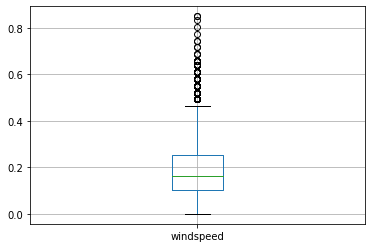

In [ ]:
#Identificando outliers
dataframe_bikes[['windspeed']].boxplot()

In [ ]:
#Preenchendo os valores nulos com as médias
dataframe_bikes['hum'].fillna(dataframe_bikes['hum'].mean(),inplace=True)
dataframe_bikes['cnt'].fillna(dataframe_bikes['cnt'].mean(),inplace=True)
dataframe_bikes['casual'].fillna(dataframe_bikes['casual'].mean(),inplace=True)
dataframe_bikes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15641 entries, 1 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     14060 non-null  float64       
 1   dteday      15641 non-null  datetime64[ns]
 2   season      14061 non-null  category      
 3   yr          14076 non-null  float64       
 4   mnth        14062 non-null  float64       
 5   hr          14068 non-null  float64       
 6   holiday     14076 non-null  float64       
 7   weekday     14078 non-null  float64       
 8   workingday  14097 non-null  float64       
 9   weathersit  14078 non-null  float64       
 10  temp        14066 non-null  float64       
 11  atemp       14076 non-null  float64       
 12  hum         15641 non-null  float64       
 13  windspeed   14082 non-null  float64       
 14  casual      15641 non-null  float64       
 15  registered  14090 non-null  float64       
 16  cnt         15641 non-

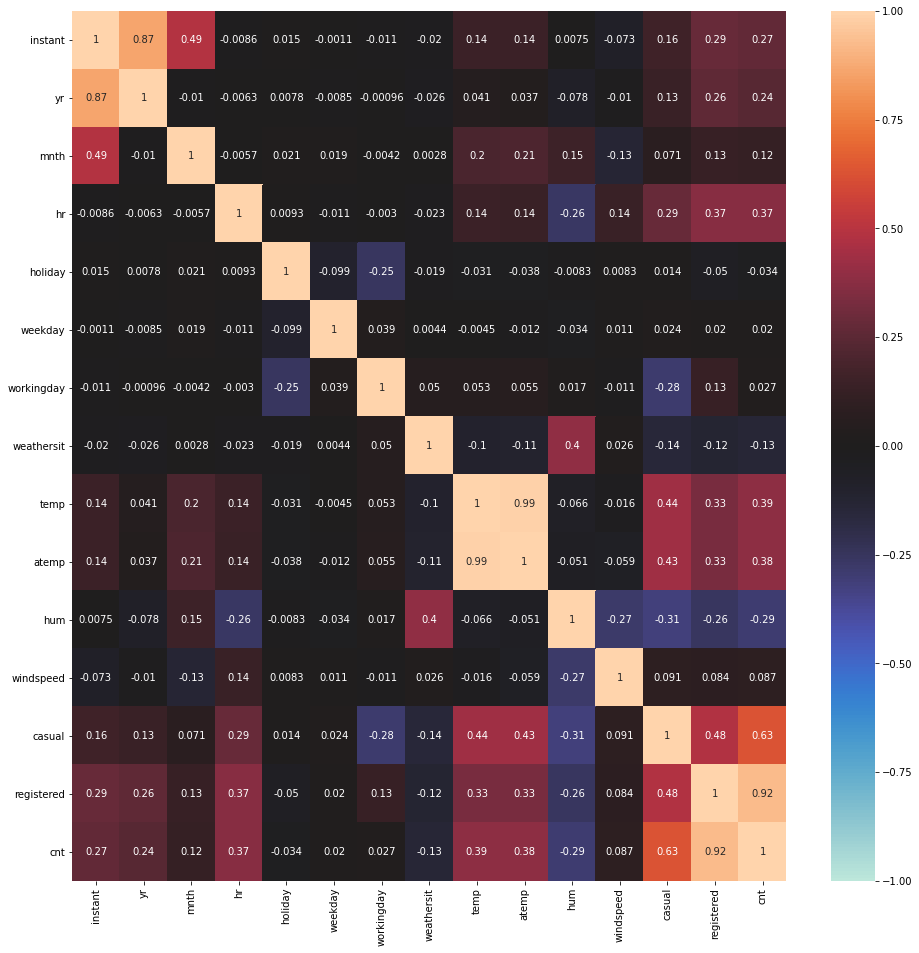

-0.29247197527172736

In [ ]:
#Realiza o plot dos dados
plt.figure(figsize=(16, 16))
matriz_de_correlação = dataframe_bikes.corr() # dataframe_bikes.corr() #matriz de correlação
sns.heatmap(matriz_de_correlação, annot=True,vmin=-1, vmax=1,center= 0) #plotando a matriz de correlação com o seaborn
plt.show()
dataframe_bikes['hum'].corr(dataframe_bikes['cnt'])

In [ ]:
#Realizando a análise de regressão
x = dataframe_bikes[['hum','casual']].values #variável independente 
Y = dataframe_bikes['cnt'].values #variável dependente 

In [ ]:
#Importa o modelo de regressão linear univariada
from sklearn.linear_model import LinearRegression

In [ ]:
#Realiza a construção do modelo de regressão
reg= LinearRegression()
x_Reshaped=x.reshape((-1, 2)) #coloca os dados no formato 2D
regressao= reg.fit (x_Reshaped,Y) # encontra os coeficientes (realiza a regressão)

In [ ]:
#Realiza a previsão
previsao=reg.predict(x_Reshaped)

In [ ]:
#Utilização de Árvore de Decisão como preditor
from sklearn.tree import DecisionTreeRegressor  #importando a árvore de decisão como regressor

In [ ]:
arvore_regressora = DecisionTreeRegressor() #define o objeto para a árvore de decisão como regressora
arvore_regressora.fit(x, Y) #aplica a regressão

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
#Realiza a previsão
previsao_arvore = arvore_regressora.predict(x)

In [ ]:
#Análise do modelo
from sklearn.metrics import r2_score #método para o cálculo do R2 (coeficiente de determinação)

In [ ]:
#Parâmetros encontrados
print('Y = {}X {}'.format(reg.coef_,reg.intercept_))

R_2 = r2_score(Y, previsao_arvore)  #realiza o cálculo do R2

print("Coeficiente de Determinação (R2):", R_2)


Y = [-99.75012328   2.21512197]X 173.29337505135578
Coeficiente de Determinação (R2): 0.7098339715834964
